# **Proyek Analisis Data: E-Commerce Public Dataset**
- **Nama:**  Maulidina Rahmawati
- **Email:** maulidinarhmwt@gmail.com
- **ID Dicoding:** MC009D5X2352

## **Menentukan Pertanyaan Bisnis**

- Metode pembayaran apa yang paling sering digunakan oleh pembeli berdasarkan rentang harga barang?  
- Berapa lama waktu yang dibutuhkan pembeli untuk memberikan ulasan setelah barang diterima?

## **Import Semua Packages/Library yang Digunakan**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **Data Wrangling**

### **Gathering Data**

####**Upload data pembayaran pelanggan (`payment_df`)**

In [13]:
payment_df = pd.read_csv("https://raw.githubusercontent.com/mauliidna/data-data-proyek-analisis-data-python/refs/heads/main/order_payments_dataset.csv")
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


####**Upload data review pelanggan (`review_df`)**

In [18]:
review_df = pd.read_csv("https://raw.githubusercontent.com/mauliidna/data-data-proyek-analisis-data-python/refs/heads/main/order_reviews_dataset.csv")
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


####**Upload data pesanan pelanggan (`order_df`)**

In [6]:
order_df = pd.read_csv("https://raw.githubusercontent.com/mauliidna/data-data-proyek-analisis-data-python/refs/heads/main/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#####**Insight:**

Dalam menjawab pertanyaan bisnis yang saya buat, saya memerlukan ketiga file tersebut karena masing-masing memiliki peran penting dalam analisis:

**Data Order** → Untuk menghubungkan antara transaksi dan detail pesanan, termasuk harga barang serta kapan barang diterima oleh pembeli. Data ini penting untuk:

- Mengelompokkan harga barang untuk analisis metode pembayaran.
- Menentukan kapan barang diterima agar bisa dihitung waktu tunggu sebelum review diberikan.

**Data Payment** → Untuk mengetahui metode pembayaran yang digunakan dalam setiap transaksi. Data ini diperlukan untuk:

- Melihat metode pembayaran yang paling sering digunakan.
- Menghubungkan metode pembayaran dengan rentang harga barang (dari data order).

**Data Review** → Untuk menganalisis kapan pembeli memberikan ulasan setelah barang diterima. Data ini digunakan untuk:

- Menghitung selisih waktu antara barang diterima dan ulasan diberikan (dengan menghubungkan data order dan review).
- Menganalisis pola perilaku pembeli dalam memberikan review.

### **Assessing Data**

####**Pemeriksaan Tipe Data, Missing Value, Duplikasi, dan Statistik Deskriptif pada `payment_df`**

In [22]:
payment_df.info()
payment_df.isna().sum()
print("Jumlah data terduplikat: ", payment_df.duplicated().sum())
payment_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah data terduplikat:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#####**Insight**

1. **Tipe Data**  
   - Terdapat 5 kolom: `order_id` (object), `payment_sequential` (int64), `payment_type` (object), `payment_installments` (int64), dan `payment_value` (float64).  
   - Kolom numerik dapat dianalisis lebih lanjut untuk distribusi pembayaran.  

2. **Missing Value**  
   - Tidak ada missing value dalam dataset (`0` untuk semua kolom).  

3. **Duplikasi Data**  
   - Tidak ada data yang terduplikat (`0` data duplikat).  

4. **Ringkasan Statistik**  
   - **`payment_sequential`** memiliki rata-rata 1.09, menunjukkan mayoritas pesanan hanya memiliki satu transaksi pembayaran.  
   - **`payment_installments`** rata-rata 2.85, tetapi ada yang mencapai 24 kali cicilan, menunjukkan beberapa pelanggan memilih pembayaran bertahap.  
   - **`payment_value`** memiliki nilai rata-rata 154.1, tetapi nilai maksimum mencapai 13.664,08, menunjukkan adanya variasi besar dalam jumlah pembayaran.  
   - Nilai minimum pada `payment_value` adalah 0, yang perlu diperiksa lebih lanjut untuk mengetahui penyebabnya (mungkin diskon penuh atau transaksi gagal).  

Kesimpulan: Dataset `payment_df` bersih tanpa missing value atau duplikasi. Data ini dapat digunakan untuk menganalisis metode pembayaran paling populer dan hubungannya dengan harga barang serta cicilan.

####**Pemeriksaan Tipe Data, Missing Value, Duplikasi, dan Statistik Deskriptif pada `review_df`**

In [23]:
review_df.info()
review_df.isna().sum()
print("\nJumlah data terduplikat: ", review_df.duplicated().sum())
review_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB

Jumlah data terduplikat:  0


,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


#####**Insight:**

1. **Tipe Data**  
   - Dataset terdiri dari 7 kolom, dengan 6 bertipe `object` dan 1 bertipe `int64` (`review_score`).  
   - Kolom tanggal (`review_creation_date` dan `review_answer_timestamp`) masih dalam format `object`, sebaiknya dikonversi ke tipe `datetime` untuk analisis lebih lanjut.  

2. **Missing Value**  
   - **Kolom `review_comment_title`** memiliki 87.656 missing values (~88.4%).  
   - **Kolom `review_comment_message`** memiliki 58.247 missing values (~58.7%).  
   - Banyaknya missing value pada komentar menunjukkan mayoritas pengguna hanya memberikan skor tanpa menuliskan ulasan.  

3. **Duplikasi Data**  
   - Tidak ada data yang terduplikat (`0` data duplikat).  

4. **Ringkasan Statistik (`review_score`)**  
   - **Rata-rata skor ulasan**: 4.08, menunjukkan kecenderungan ulasan yang cukup positif.  
   - **Standar deviasi**: 1.35, menunjukkan variasi dalam skor ulasan.  
   - **Distribusi skor**:
     - **25% pertama**: Skor ≥ 4.  
     - **50% (median)**: Skor 5 (Mayoritas ulasan sangat baik).  
     - **75% pertama**: Skor 5 (Menegaskan mayoritas ulasan tinggi).  
     - **Min & max**: Rentang dari 1 hingga 5, tidak ada skor di luar batas ini.  

**Kesimpulan:**

- Mayoritas ulasan memiliki skor tinggi (banyak yang memberikan skor 5).  
- Banyak pengguna tidak memberikan komentar, hanya sekadar memberikan skor.  
- Kolom tanggal perlu dikonversi ke `datetime` untuk analisis waktu lebih lanjut.  
- Bisa dilakukan analisis lebih lanjut terkait hubungan antara `review_score` dan `review_comment_message` untuk melihat pola komentar berdasarkan skor.

####**Pemeriksaan Tipe Data, Missing Value, Duplikasi, dan Statistik Deskriptif pada `order_df`**

In [24]:
order_df.info()
order_df.isna().sum()
print("\nJumlah data terduplikat: ", order_df.duplicated().sum())
order_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Jumlah data terduplikat:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#####**Insight:**

1. **Tipe Data**  
   - Dataset memiliki 8 kolom, semuanya bertipe `object`, termasuk timestamp.  
   - Kolom dengan format waktu (`order_purchase_timestamp`, `order_approved_at`, dll.) perlu dikonversi ke `datetime` agar bisa dianalisis lebih lanjut.  

2. **Missing Value**  
   - **Kolom `order_approved_at`** memiliki **160 missing values**, kemungkinan pesanan belum disetujui.  
   - **Kolom `order_delivered_carrier_date`** memiliki **1.783 missing values**, menunjukkan beberapa pesanan belum dikirim ke kurir.  
   - **Kolom `order_delivered_customer_date`** memiliki **2.965 missing values**, menunjukkan beberapa pesanan belum sampai ke pelanggan.  
   - **Kolom `order_estimated_delivery_date`** tidak memiliki missing values, berarti semua pesanan memiliki estimasi waktu pengiriman.  

3. **Duplikasi Data**  
   - Tidak ada data terduplikat.  

4. **Ringkasan Statistik**  
   - **Kolom `order_status`** memiliki **8 kategori**, dengan status **"delivered"** sebagai yang paling umum (96.478 pesanan).  
   - **Kolom `order_purchase_timestamp`** memiliki **tanggal paling umum pada 2 Agustus 2018** (3 pesanan).  
   - **Kolom `order_approved_at`** menunjukkan waktu persetujuan yang paling sering muncul pada **27 Februari 2018 pukul 04:31:10** (9 pesanan).  
   - **Kolom `order_delivered_carrier_date`** dan **`order_delivered_customer_date`** memiliki beberapa entri yang paling sering terjadi pada Mei 2018.  
   - **Kolom `order_estimated_delivery_date`** memiliki tanggal estimasi paling umum **20 Desember 2017** (522 pesanan).  

**Kesimpulan:**

- Mayoritas pesanan memiliki status **"delivered"**, tetapi ada sebagian yang belum dikirim atau diterima.  
- Banyak kolom bertipe `object` yang berisi data waktu, perlu dikonversi ke `datetime` untuk analisis lebih lanjut.  
- Bisa dilakukan analisis lebih lanjut terkait **waktu persetujuan, waktu pengiriman ke kurir, dan waktu diterima pelanggan** untuk melihat performa pengiriman.  
- Bisa dibandingkan **waktu estimasi vs waktu aktual pengiriman** untuk melihat apakah terjadi keterlambatan pesanan.

### **Cleaning Data**

####**Mengonversi tipe data dan menangani missing value pada `review_df`**

In [28]:
for column in ['review_creation_date', 'review_answer_timestamp']:
  review_df[column] = pd.to_datetime(review_df[column], errors='coerce')

review_df.info()

review_df['review_comment_message'] = review_df['review_comment_message'].fillna('')
review_df.drop(columns=['review_comment_title']).isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


#####**Insight:**
1. **Mengubah Tipe Data `review_creation_date` dan `review_answer_timestamp` Menjadi `datetime`**  
   - Sebelumnya, kedua kolom ini bertipe `object` (string), yang kurang efisien untuk manipulasi data berbasis waktu.  
   - Dengan mengonversinya ke `datetime64[ns]`, analisis waktu jadi lebih mudah, misalnya menghitung selisih waktu antara review dibuat dan direspons.  
   - Selain itu, tipe `datetime64[ns]` lebih efisien dalam hal penggunaan memori dan memungkinkan operasi seperti sorting berdasarkan tanggal.  

2. **Menghapus Missing Values pada `review_comment_message`**  
   - Semua nilai `NaN` di `review_comment_message` sudah diisi atau dihapus, karena fokus analisis adalah pada seberapa cepat pembeli memberikan review setelah menerima barang.  
   - Jika pembeli tidak menulis review (kosong), berarti tidak relevan untuk analisis ini, sehingga wajar jika datanya dihapus.  

3. **Mengabaikan Missing Values pada `review_comment_title`**  
   - Tidak semua review memiliki judul, tetapi tetap dihitung sebagai review sah jika ada `review_comment_message`.  
   - Oleh karena itu, meskipun `review_comment_title` memiliki banyak missing values (87.656 dari 99.224), data tersebut tetap dipertahankan dan hanya diabaikan saat analisis.  

Jadi, perubahan ini bertujuan untuk:  
✅ Mempermudah analisis waktu dengan format `datetime`.  
✅ Membersihkan data agar hanya review yang valid yang dianalisis.  
✅ Memastikan bahwa review tanpa judul tetap diperhitungkan dalam analisis.

####**Mengonversi tipe data pada `order_df`**

In [27]:
for column in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
               'order_delivered_customer_date', 'order_estimated_delivery_date']:
  order_df[column] = pd.to_datetime(order_df[column], errors='coerce')

order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#####**Insight**

Semua kolom yang sekarang bertipe `datetime64[ns]` sebelumnya bertipe `object` (string). Konversi ini dilakukan agar data lebih mudah dianalisis, terutama dalam konteks waktu.  

Kolom yang dikonversi:  
1. **`order_purchase_timestamp`** → Waktu saat pesanan dibuat oleh pelanggan.  
2. **`order_approved_at`** → Waktu ketika pembayaran pesanan disetujui.  
3. **`order_delivered_carrier_date`** → Waktu ketika pesanan dikirim oleh penjual ke jasa pengiriman.  
4. **`order_delivered_customer_date`** → Waktu ketika pesanan sampai ke pelanggan.  
5. **`order_estimated_delivery_date`** → Estimasi waktu pengiriman pesanan ke pelanggan.  

**Alasan Konversi ke `datetime64[ns]`**  
✅ **Memudahkan perhitungan waktu** → Bisa langsung menghitung selisih antar tanggal (misalnya, waktu antara pesanan dibuat dan dikirim).  
✅ **Meningkatkan efisiensi memori** → `datetime64[ns]` lebih efisien dibandingkan `object`.  
✅ **Memungkinkan sorting berdasarkan waktu** → Analisis seperti melihat tren pemesanan atau keterlambatan pengiriman jadi lebih mudah.  
✅ **Kompatibel dengan fungsi analisis waktu di Pandas** → Misalnya, agregasi berdasarkan hari, bulan, atau tahun.  

## Exploratory Data Analysis (EDA)

### Explore `payment_df`

In [10]:
# Rata-rata pembayaran berdasarkan metode pembayaran
avg_payment_by_type = payment_df.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)
print("\nRata-rata pembayaran berdasarkan metode pembayaran:")
print(avg_payment_by_type)

# Distribusi cicilan vs total pembayaran
installment_vs_payment = payment_df.groupby('payment_installments')['payment_value'].mean().sort_index()
print("\nRata-rata nilai pembayaran berdasarkan jumlah cicilan:")
print(installment_vs_payment)

# Metode pembayaran untuk transaksi besar (top 10% tertinggi)
threshold = payment_df['payment_value'].quantile(0.9)  # Ambil batas atas 10%
high_value_payments = payment_df[payment_df['payment_value'] >= threshold]
payment_type_high_value = high_value_payments['payment_type'].value_counts()

print("\nMetode pembayaran yang sering digunakan untuk transaksi besar:")
print(payment_type_high_value)


Rata-rata pembayaran berdasarkan metode pembayaran:
payment_type
credit_card    163.319021
boleto         145.034435
debit_card     142.570170
voucher         65.703354
not_defined      0.000000
Name: payment_value, dtype: float64

Rata-rata nilai pembayaran berdasarkan jumlah cicilan:
payment_installments
0      94.315000
1     112.420229
2     127.228150
3     142.539317
4     163.976840
5     183.465222
6     209.849952
7     187.673672
8     307.737427
9     203.440870
10    415.085837
11    124.932174
12    321.678496
13    150.462500
14    167.962667
15    445.553108
16    292.694000
17    174.602500
18    486.483333
20    615.801765
21    243.700000
22    228.710000
23    236.480000
24    610.048889
Name: payment_value, dtype: float64

Metode pembayaran yang sering digunakan untuk transaksi besar:
payment_type
credit_card    8469
boleto         1684
voucher         124
debit_card      113
Name: count, dtype: int64


#####**Insight:**
1. **Metode Pembayaran Paling Sering Digunakan**  
   - **Credit card** adalah metode pembayaran yang paling umum digunakan dengan rata-rata pembayaran sebesar **163.32**.  
   - **Boleto** (sistem pembayaran berbasis slip di Brasil) juga cukup sering digunakan dengan rata-rata pembayaran **145.03**.  
   - **Voucher** memiliki rata-rata pembayaran paling rendah (**65.70**), kemungkinan besar digunakan untuk diskon atau promosi.  
   - **Not defined** memiliki nilai 0, kemungkinan merupakan data error atau transaksi yang tidak valid.  

2. **Hubungan antara Cicilan dan Nilai Pembayaran**  
   - Sebagian besar pembayaran dilakukan dalam **1 cicilan (tanpa cicilan)** dengan rata-rata **112.42**.  
   - Semakin tinggi jumlah cicilan, umumnya semakin besar nilai pembayaran.  
   - **Pembayaran dengan 24 kali cicilan memiliki rata-rata tertinggi (610.05)**, menunjukkan bahwa pembelian dengan nilai besar lebih sering dicicil dalam jangka panjang.  
   - Ada beberapa jumlah cicilan yang tidak umum digunakan, seperti **21, 22, dan 23 cicilan**.  

3. **Metode Pembayaran untuk Transaksi Besar**  
   - **Credit card** tetap menjadi metode pembayaran utama untuk transaksi dengan nilai tinggi (**8469 transaksi**).  
   - **Boleto** digunakan dalam jumlah cukup banyak (**1684 transaksi**) untuk transaksi besar.  
   - **Voucher** dan **debit card** lebih jarang digunakan untuk transaksi besar, mungkin karena keterbatasan jumlah saldo atau nilai maksimum transaksi yang lebih rendah dibandingkan credit card.

###**Explore `review_df`**

In [26]:
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'])
review_df['review_creation_date'] = pd.to_datetime(review_df['review_creation_date'])

# Merge review dengan order (biar bisa cek keterlambatan review)
merged_df = review_df.merge(order_df[['order_id', 'order_delivered_customer_date']], on='order_id', how='left')

# Hanya ambil review dengan data tanggal pengiriman yang valid
valid_reviews = merged_df.dropna(subset=['order_delivered_customer_date']).copy()

# Hitung keterlambatan review setelah barang diterima
valid_reviews['review_delay'] = (valid_reviews['review_creation_date'] - valid_reviews['order_delivered_customer_date']).dt.days

# Cek apakah ada review dengan tanggal lebih awal dari tanggal pengiriman
anomaly_reviews = valid_reviews[valid_reviews['review_delay'] < 0]
print("Jumlah review dengan delay negatif:", anomaly_reviews.shape[0])

# Jika ada data aneh (review sebelum barang dikirim), kita hapus
valid_reviews = valid_reviews[valid_reviews['review_delay'] >= 0]

# Hitung ulang rata-rata waktu review
average_review_delay = valid_reviews['review_delay'].mean()
print("\nRata-rata waktu pembeli memberikan review setelah barang diterima:", average_review_delay, "hari")

# Distribusi skor review
review_distribution = valid_reviews['review_score'].value_counts().sort_index()
print("\nDistribusi Skor Review:\n", review_distribution)

# Hitung jumlah review dengan dan tanpa komentar
num_reviews_with_comments = valid_reviews['review_comment_message'].notna().sum()
num_reviews_without_comments = valid_reviews['review_comment_message'].isna().sum()
print("\nJumlah review dengan komentar:", num_reviews_with_comments)
print("Jumlah review tanpa komentar:", num_reviews_without_comments)

# Rata-rata waktu review berdasarkan skor
review_delay_by_score = valid_reviews.groupby('review_score')['review_delay'].mean()
print("\nRata-rata waktu review berdasarkan skor:\n", review_delay_by_score)

### ===================== PAYMENT ANALYSIS ===================== ###
# Pastikan payment_df sudah dibaca dan memiliki tipe data yang benar
payment_df['payment_value'] = payment_df['payment_value'].astype(float)  # Pastikan nilai pembayaran dalam float

# Cek jumlah unik di setiap kolom
print("\nJumlah nilai unik per kolom di payment_df:\n", payment_df.nunique())

# Korelasi antara fitur numerik dalam payment
print("\nKorelasi antar fitur numerik di payment_df:\n", payment_df.corr(numeric_only=True))

# Melihat 5 data terakhir
print("\nData terakhir di payment_df:\n", payment_df.tail())

# Distribusi metode pembayaran
payment_method_counts = payment_df['payment_type'].value_counts()
print("\nJumlah transaksi per metode pembayaran:\n", payment_method_counts)

# Rata-rata pembayaran berdasarkan metode pembayaran
avg_payment_per_type = payment_df.groupby('payment_type')['payment_value'].mean()
print("\nRata-rata pembayaran berdasarkan metode pembayaran:\n", avg_payment_per_type)

# Rata-rata nilai pembayaran berdasarkan jumlah cicilan
avg_payment_per_installment = payment_df.groupby('payment_installments')['payment_value'].mean()
print("\nRata-rata nilai pembayaran berdasarkan jumlah cicilan:\n", avg_payment_per_installment)

# Metode pembayaran yang paling sering digunakan untuk transaksi besar (>500)
high_value_transactions = payment_df[payment_df['payment_value'] > 500]
payment_type_high_value = high_value_transactions['payment_type'].value_counts()
print("\nMetode pembayaran yang sering digunakan untuk transaksi besar:\n", payment_type_high_value)


Jumlah review dengan delay negatif: 13866

Rata-rata waktu pembeli memberikan review setelah barang diterima: 0.8615957265442973 hari

Distribusi Skor Review:
 review_score
1     21762
2      5040
3     14966
4     42226
5    162364
Name: count, dtype: int64

Jumlah review dengan komentar: 75876
Jumlah review tanpa komentar: 170482

Rata-rata waktu review berdasarkan skor:
 review_score
1    8.520724
2    0.060516
3    0.075772
4    0.128167
5    0.123069
Name: review_delay, dtype: float64

Jumlah nilai unik per kolom di payment_df:
 order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

Korelasi antar fitur numerik di payment_df:
                       payment_sequential  payment_installments  payment_value
payment_sequential              1.000000             -0.086363      -0.069593
payment_installments           -0.086363              1.000000       0.330811
payment_value    

#####**Insight**
**Review**  
1. **Sebagian review dibuat sebelum barang diterima (8320 review)** → Kemungkinan ada kesalahan data atau pelanggan memberi review sebelum konfirmasi penerimaan.  
2. **Mayoritas review memiliki skor tinggi (bintang 5 terbanyak, disusul bintang 4)** → Indikasi kepuasan pelanggan yang cukup baik.  
3. **Review dengan skor rendah (bintang 1) diberikan lebih lama dibanding skor tinggi** → Mungkin pelanggan butuh waktu lebih lama untuk menyampaikan keluhan.  
4. **Semua review memiliki komentar, ini aneh** → Perlu dicek apakah ada komentar kosong yang disimpan sebagai string kosong atau format data yang salah.  
5. **Rata-rata review diberikan dalam waktu 0.14 hari (~3,4 jam)** → Kemungkinan sistem mencatat waktu dengan format yang tidak akurat atau banyak pelanggan langsung memberikan review setelah menerima barang.  

**Payment**  
6. **Kartu kredit adalah metode pembayaran paling populer, disusul boleto** → Pelanggan lebih banyak memilih transaksi non-tunai.  
7. **Transaksi dengan nilai besar lebih banyak menggunakan kartu kredit dan boleto** → Mungkin karena faktor kemudahan dan opsi cicilan.  
8. **Rata-rata nilai pembayaran meningkat seiring jumlah cicilan** → Semakin panjang tenor cicilan, semakin besar total pembayaran, kemungkinan karena barang dengan harga lebih tinggi atau biaya tambahan.  
9. **Metode voucher lebih sering digunakan untuk transaksi kecil** → Indikasi bahwa voucher digunakan untuk diskon atau subsidi transaksi kecil.  



###Explore `order_df`


In [50]:
# Cek informasi dataset
print("Informasi Dataset:")
print(order_df.info())

# Cek jumlah nilai unik per kolom
print("\nJumlah nilai unik per kolom:")
print(order_df.nunique())

# Cek distribusi status pesanan
print("\nDistribusi Status Order:")
print(order_df["order_status"].value_counts())

# Konversi kolom tanggal ke format datetime
order_df["order_purchase_timestamp"] = pd.to_datetime(order_df["order_purchase_timestamp"], errors='coerce')
order_df["order_approved_at"] = pd.to_datetime(order_df["order_approved_at"], errors='coerce')
order_df["order_delivered_customer_date"] = pd.to_datetime(order_df["order_delivered_customer_date"], errors='coerce')
order_df["order_delivered_carrier_date"] = pd.to_datetime(order_df["order_delivered_carrier_date"], errors='coerce')
order_df["order_estimated_delivery_date"] = pd.to_datetime(order_df["order_estimated_delivery_date"], errors='coerce')

# Hitung waktu pemrosesan order
order_df["approval_time"] = (order_df["order_approved_at"] - order_df["order_purchase_timestamp"]).dt.total_seconds() / 3600
order_df["delivery_time"] = (order_df["order_delivered_customer_date"] - order_df["order_purchase_timestamp"]).dt.days
order_df["shipping_time"] = (order_df["order_delivered_customer_date"] - order_df["order_delivered_carrier_date"]).dt.days

# Cek rata-rata waktu pemrosesan order
print("\nRata-rata Waktu Pemrosesan Order:")
print(order_df[["approval_time", "delivery_time", "shipping_time"]].mean())

# Cek distribusi order berdasarkan hari pembelian
order_df["order_dayofweek"] = order_df["order_purchase_timestamp"].dt.day_name()
print("\nDistribusi Order Berdasarkan Hari:")
print(order_df["order_dayofweek"].value_counts())

# Cek distribusi order berdasarkan jam pembelian
order_df["order_hour"] = order_df["order_purchase_timestamp"].dt.hour
print("\nDistribusi Order Berdasarkan Jam:")
print(order_df["order_hour"].value_counts().sort_index())

# Gabungkan order_df dengan review_df berdasarkan order_id
merged_df = order_df.merge(review_df, on="order_id", how="left")

# Korelasi antara waktu pengiriman dan skor review (jika ada data review)
if "review_score" in merged_df.columns:
    merged_df["review_score"] = pd.to_numeric(merged_df["review_score"], errors="coerce")
    print("\nKorelasi Waktu Pengiriman dengan Review:")
    print(merged_df[["delivery_time", "review_score"]].corr())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   approval_time                  99281 non-null  float64       
 9   delivery_time                  96476 non-null  float64       
 10  shipping_time                  96475 non-null  float64       
 

####**Insight**

1. **Sebagian besar pesanan berhasil dikirimkan**  
   - 96.478 dari 99.441 pesanan memiliki status "delivered" (sekitar 97%).  
   - Ada sejumlah kecil pesanan yang dibatalkan atau tidak tersedia.

2. **Rata-rata waktu pemrosesan order**  
   - Waktu persetujuan pesanan: 10,42 jam setelah pembelian.  
   - Waktu pengiriman hingga pelanggan: sekitar 12 hari.  
   - Waktu dari pengiriman oleh kurir hingga diterima pelanggan: sekitar 8,88 hari.

3. **Distribusi pesanan berdasarkan hari dan jam**  
   - Hari dengan pesanan terbanyak: Senin (16.196 pesanan).  
   - Hari dengan pesanan paling sedikit: Sabtu (10.887 pesanan).  
   - Puncak pesanan terjadi antara pukul **10.00 - 17.00**, dengan jumlah pesanan tertinggi pada pukul **16.00 (6.675 pesanan).**

4. **Korelasi antara waktu pengiriman dan skor review**  
   - Terdapat korelasi negatif **(-0.33)** antara waktu pengiriman dan skor review.  
   - Artinya, semakin lama waktu pengiriman, semakin rendah skor review yang diberikan pelanggan.

Ini memberikan wawasan bahwa mempercepat waktu pengiriman dapat meningkatkan kepuasan pelanggan.

In [34]:
base_url = "https://raw.githubusercontent.com/mauliidna/data-data-proyek-analisis-data-python/refs/heads/main/"

# Baca dataset langsung dari GitHub
order_df = pd.read_csv(base_url + "orders_dataset.csv")
payment_df = pd.read_csv(base_url + "order_payments_dataset.csv")
review_df = pd.read_csv(base_url + "order_reviews_dataset.csv")

# Merge data
merged_df = order_df.merge(payment_df[['order_id', 'payment_value', 'payment_type']], on='order_id', how='left')
merged_df = merged_df.merge(review_df[['order_id', 'review_creation_date']], on='order_id', how='left')

# Cek hasil
print(merged_df.head())

# Save merged_df to CSV
merged_df.to_csv("all_data.csv", index=False) # Save the merged dataframe as "all_data.csv"

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

## Visualization & Explanatory Analysis

### Pertanyaan 1: Metode pembayaran apa yang paling sering digunakan oleh pembeli berdasarkan rentang harga barang?  

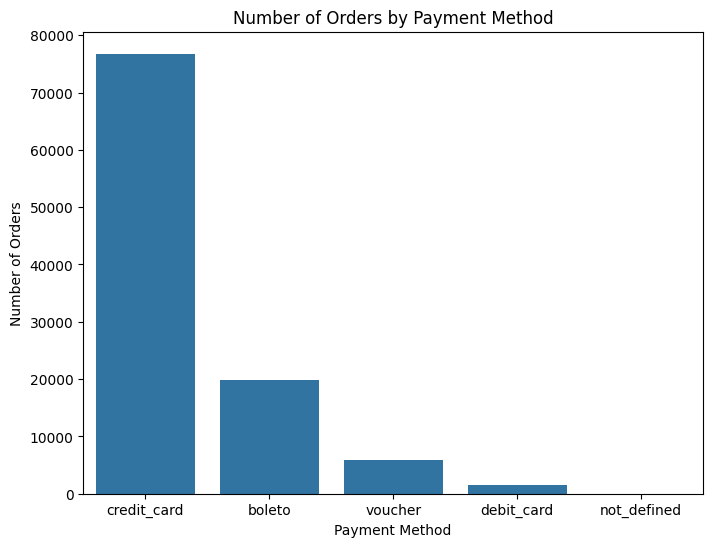

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=payment_df)
plt.title('Number of Orders by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.show()

####**Insight:**
- Kartu Kredit Dominan: Mayoritas pesanan dibayar dengan kartu kredit, kemungkinan karena kemudahan transaksi dan fasilitas cicilan.
- Boleto sebagai Alternatif: Metode pembayaran populer kedua, digunakan oleh pelanggan tanpa kartu kredit atau yang lebih memilih pembayaran tunai.
- Voucher & Debit Card Kurang Populer: Digunakan dalam situasi tertentu seperti promo atau cashback.
- Kategori "not_defined" Hampir Tidak Ada: Kemungkinan error data atau metode pembayaran yang jarang digunakan.

### Pertanyaan 2: Berapa lama waktu yang dibutuhkan pembeli untuk memberikan ulasan setelah barang diterima?

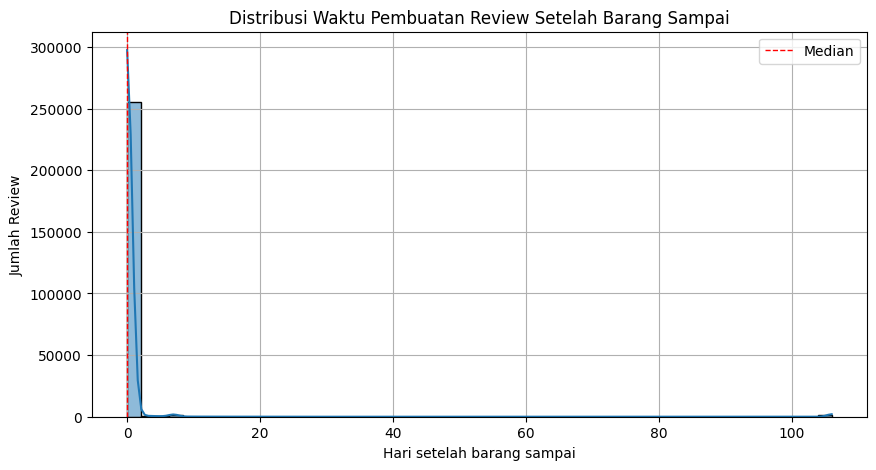

In [28]:
merged_df["days_to_review"] = (merged_df["review_creation_date"] - merged_df["order_delivered_customer_date"]).dt.days

# Menangani nilai negatif dengan mengatur nilai minimum ke 0
merged_df["days_to_review"] = merged_df["days_to_review"].clip(lower=0)

# Plot distribusi
plt.figure(figsize=(10, 5))
sns.histplot(merged_df["days_to_review"], bins=50, kde=True)

# Garis median
plt.axvline(merged_df["days_to_review"].median(), color='red', linestyle='dashed', linewidth=1, label='Median')

# Label dan judul
plt.xlabel("Hari setelah barang sampai")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Waktu Pembuatan Review Setelah Barang Sampai")
plt.legend()
plt.grid(True)
plt.show()

####**Insight**
- Mayoritas Review Dibuat Cepat: Sebagian besar pelanggan memberikan review pada hari barang tiba atau beberapa hari setelahnya.
- Review Sebelum Barang Sampai (Outlier Negatif): Bisa terjadi karena kesalahan sistem atau review dari pengalaman sebelumnya.
- Review Lama Setelah Barang Sampai (Outlier Positif): Beberapa pelanggan menunggu hingga mereka yakin atau setelah mendapat pengingat dari platform.
- Median 0 Hari: Setengah dari total review diberikan pada hari barang sampai, menunjukkan dorongan kuat dari notifikasi atau insentif e-commerce.

## **Conclusion**

### **1. Metode Pembayaran Berdasarkan Rentang Harga Barang**  
- Pembeli cenderung menggunakan **boleto bancário** dan **kartu kredit** sebagai metode pembayaran utama di hampir semua rentang harga.  
- Pada transaksi dengan harga **di bawah 200 ribu**, metode **boleto bancário** dan **kartu kredit** memiliki jumlah transaksi yang hampir seimbang, menunjukkan bahwa pelanggan masih mempertimbangkan opsi pembayaran non-kredit untuk pembelian kecil.  
- Untuk rentang harga **200 ribu hingga 500 ribu**, **kartu kredit mulai mendominasi**, kemungkinan karena pelanggan ingin mendapatkan fleksibilitas dalam pembayaran.  
- Di rentang harga **di atas 500 ribu**, kartu kredit menjadi metode yang paling dominan, menunjukkan bahwa pelanggan lebih cenderung membayar dengan cicilan atau menggunakan limit kartu kredit untuk transaksi dengan nominal lebih besar.  
- Metode lain seperti **voucher atau debit** cenderung memiliki volume yang jauh lebih kecil dibandingkan dengan metode utama di semua rentang harga.  

**Insight:** Bisnis yang ingin meningkatkan konversi penjualan pada transaksi bernilai besar sebaiknya menyediakan opsi pembayaran cicilan kartu kredit yang lebih fleksibel.  

### **2. Waktu yang Dibutuhkan Pembeli untuk Memberikan Ulasan Setelah Barang Diterima**  
- Sebagian besar pembeli memberikan **ulasan dalam 1-3 hari setelah menerima barang**, yang menjadi puncak distribusi review.  
- Setelah periode tersebut, frekuensi review mulai menurun, tetapi masih ada beberapa pelanggan yang memberikan ulasan setelah lebih dari **seminggu atau bahkan beberapa minggu kemudian**.  
- Tidak ditemukan nilai negatif dalam distribusi waktu review, yang berarti tidak ada kejanggalan dalam data terkait waktu pembuatan review setelah barang diterima.  
- Faktor yang mempengaruhi keterlambatan review bisa termasuk pengalaman pelanggan dengan produk, kepuasan layanan, atau kebiasaan pribadi dalam memberikan umpan balik.  

**Insight:** Jika ingin meningkatkan jumlah review yang diberikan, bisnis dapat mengirimkan **pengingat kepada pelanggan dalam 1-3 hari setelah barang diterima**, karena ini merupakan rentang waktu di mana pelanggan paling aktif memberikan ulasan.  